Функция  y = 5 * sin(x) - x
1. Определить корни
2. Найти интернвалы, на которых функция возрастает
3. Найти интернвалы, на которых функция убывает
4. Построить график
5. Вычислить вершину
6. Определить промежутки, на котором f > 0
7. Определить промежутки, на котором f < 0

In [1]:

from sympy import *
x = Symbol('x',real=True)
y = 5*sin(x) - x
y

-x + 5*sin(x)

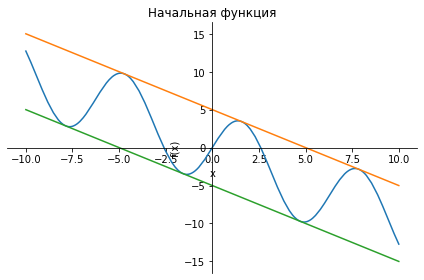

In [2]:
#Сразу построим график, чтобы была понятней закономерность синусоиды.

p1= plot(y,-x+5,-x-5, title="Начальная функция",show=False)
p1.show()


In [3]:

# solve(y,x) -вылетает, sympy пишет,что не может подобрать алгоритм.Попробуем другие solve
solveset(y,x,Interval(-pi,pi))
#видим, что для трансцендентных уравнений алгоритм выводит только общее "решение"

ConditionSet(x, Eq(-x + 5*sin(x), 0), Interval(-pi, pi))

In [4]:
# Ищем корни перебором, 0 должен подходить в любом случае, 
#это видно через автоматическое упрощение:
y.subs(x,0)

0

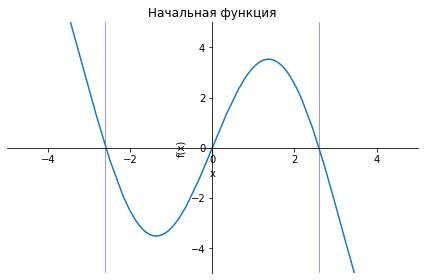

In [5]:
#оценим примерное значение других корней
#для этого увеличим масштаб графика
p1= plot(y, title="Начальная функция",xlim=[-5,5],ylim=[-5,5],show=False)
#и подберем значения перебором, проверяя через графики
p2 = plot_implicit(Eq(x,2.6),show=False)
p3 = plot_implicit(Eq(x,-2.6),show=False)
p1.extend(p2)
p1.extend(p3)
p1.show()
#на глазок, корни вот такие:
found_roots=[-2.6,0,2.6]



In [6]:
#функция для удобства подстановки
def check_x_roots(func,sub_in):
    check_res = []
    for n in range(0,len(sub_in)):
        check_res.append(func.evalf(subs={x:sub_in[n]}))
    return check_res
print(check_x_roots(y,found_roots))

[0.0224931408926793, 0, -0.0224931408926793]


In [7]:
#написал функцию, которая считает минимум до точности 0 до 1e-5(стотысячных).
def approx_x_roots(func,sub_in):
    approx_res = []
    for n in range(0,len(sub_in)):
        close_root=func.evalf(subs={x:sub_in[n]})
        sub = sub_in[n]
        while abs(close_root)> 1e-5:
                if close_root<0:
                    sub-=1e-5
                    close_root=func.evalf(subs={x:sub})
                else:
                    sub+=1e-5
                    close_root=func.evalf(subs={x:sub})
        approx_res.append(sub)
    return approx_res

found_roots=approx_x_roots(y,found_roots)
print("уточненные корни")
print(found_roots)
print("подстановка в функцию")
print(check_x_roots(y,found_roots))
#видим, что 2.6 были довольно близкими значениями., значит корни подобраны верно.

уточненные корни
[-2.595739999999972, 0, 2.595739999999972]
подстановка в функцию
[4.85339627620979e-6, 0, -4.85339627620979e-6]


In [8]:
# Для нахождения промежутков возрастания и убывания сперва нужно посчитать производную
Y = y.diff(x)
Y


5*cos(x) - 1

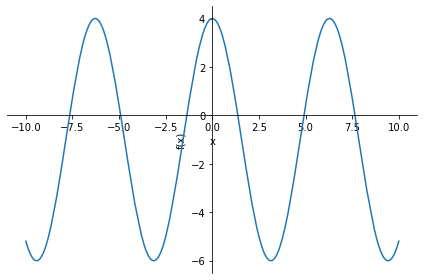

In [9]:
plot(Y)

In [10]:
diff_roots=solveset(Y, x,Interval(-pi/2,pi/2))
diff_roots

{-atan(2*sqrt(6)), atan(2*sqrt(6))}

In [11]:
# Оценим корни нумерически,до 4-го знака после запятой
N(diff_roots,4)

{-1.369, 1.369}

In [12]:
# Проверим общий случай
solveset(Y, x)
# Видно, что корни повторяются с периодом в 2𝜋 n, где n - целое число .

Union(ImageSet(Lambda(_n, 2*_n*pi - atan(2*sqrt(6)) + 2*pi), Integers), ImageSet(Lambda(_n, 2*_n*pi + atan(2*sqrt(6))), Integers))

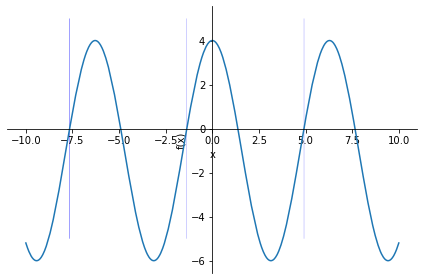

In [13]:
diff_p = plot(Y,show=False)

# Проверим периодичность 2𝜋
diff_n1 = plot_implicit(Eq(x,atan(-2*sqrt(6))+2*pi*0),show=False)
diff_p.extend(diff_n1)
diff_n2 = plot_implicit(Eq(x,atan(-2*sqrt(6))+2*pi*1),show=False)
diff_p.extend(diff_n2)
#здесь пришлось задать специально интервал для x, иначе для -7.6 не строилось
diff_n3 = plot_implicit(Eq(x,atan(-2*sqrt(6))-2*pi*1),show=False,x_var = (x,-10,10))
diff_p.extend(diff_n3)

diff_p.show()
#видим,что все хорошо, и повторяющийся отрезок у нас действительно длиной в 2𝜋 

In [14]:

#Корни производной дадут нам отрезки возрастания и убывания
solve_univariate_inequality(Y > 0,x, relational=False)

Union(Interval.Ropen(0, atan(2*sqrt(6))), Interval.open(-atan(2*sqrt(6)) + 2*pi, 2*pi))

In [15]:
solve_univariate_inequality(Y < 0,x,relational=False, domain=S.Reals)


Interval.open(atan(2*sqrt(6)), -atan(2*sqrt(6)) + 2*pi)

In [16]:
growing_set=[-atan(2*sqrt(6))+2*pi,atan(2*sqrt(6))]
growing_set = list(map(N,growing_set))
print(growing_set)
#функция y растет в промежутках ~[-1.369;1.369], c периодичностью 2𝜋

[4.91374690117502, 1.36943840600457]


In [17]:
shrinking_set = [atan(2*sqrt(6)),-atan(2*sqrt(6))+2*pi]
shrinking_set = list(map(N,shrinking_set))
print(shrinking_set)
#функция yбывает в промежутках ~[1.369;4.914], c периодичностью 2𝜋

[1.36943840600457, 4.91374690117502]


In [18]:
# Вычислим вершины на единичном отрезке, они тоже будут повторяться с периодом 2𝜋
extrem=solve(Y)
extrem

[-acos(1/5) + 2*pi, acos(1/5)]

In [19]:
extrem = list(map(N,extrem))
extrem
#по значению то же самое,что и через арктангенсы. 
# Логично, в этих точках производная меняет свой знак,
# а значит изначальная функция y находится в экстремумах(точки изгиба)

[4.91374690117502, 1.36943840600457]

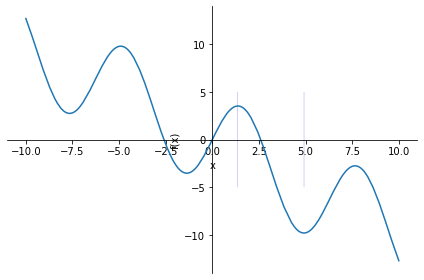

In [20]:
 e_p = plot(y,show=False)

e1  = plot_implicit(Eq(x,-acos(1/5) + 2*pi),show=False, adaptive=True)
 e_p.extend(e1)
e2 = plot_implicit(Eq(x,acos(1/5)),show=False,points=600)
e_p.extend(e2)

 e_p.show()

In [21]:
# 6. Определить промежутки, на котором f > 0
# solve_univariate_inequality(y > 0, x) пишет что 'solveset is unable to solve this equation.'
# Поэтому опять идем опытным путем по анализу графика и корней
# И запишем это красиво через "решение" неравенства

solve_pos_domain = Or(x < found_roots[0], And(x>found_roots[1],x<found_roots[2])).as_set()
solve_pos_domain

Union(Interval.open(-oo, -2.59573999999997), Interval.open(0, 2.59573999999997))

In [22]:
solveset(5*sin(x) - x>0,x,solve_pos_domain)

ConditionSet(x, -x + 5*sin(x) > 0, Union(Interval.open(-oo, -2.59573999999997), Interval.open(0, 2.59573999999997)))

In [23]:
# 7. Определить промежутки, на котором f < 0
# Запишем сходным образом
solve_neg_domain = Or(x>found_roots[2],And(x > found_roots[0],x<found_roots[1])).as_set()
solve_neg_domain

Union(Interval.open(-2.59573999999997, 0), Interval.open(2.59573999999997, oo))

In [24]:
solveset(5*sin(x) - x<0,x,solve_neg_domain)

ConditionSet(x, -x + 5*sin(x) < 0, Union(Interval.open(-2.59573999999997, 0), Interval.open(2.59573999999997, oo)))